# Capstone Project - The Battle of the Neighborhoods (Week 2)

### Applied Data Science Capstone by IBM/Coursera

###### Background Information

Toronto is a vibrant multicultural city in Canada. According to information from Statistics Canada, Toronto had a recorded population of 2,731,571 in 2016. Toronto is thus the most populous city in Canada. This large city is home to many ethnic groups - more than 50% of the residents belong to a visible minority population group. A person who lives in Toronto, as this author has, will definitely be exposed to many cultural things - particularly cuisine. Since Toronto's population has exposure to various cultures, many people are willing to try cuisines that are not of their own. At the same time, many of Toronto's immigrants who have come to Toronto in their adulthood will have great affinity to their home cuisine. There is definitely great opportunity for someone to open a restaurant of ethnic cuisine. In this Capstone Project, the opportunity to open a Chinese restaurant will be explored.

###### Business Problem

Although there are many potential customers for a Chinese restaurant, there also comes great competition. There are already two Chinatowns in Toronto with many restaurants in these neighbourhoods. Adding onto that are many other areas, such as Scarborough, where many Chinese immigrants had immigrated to in the 1980s and 1990s, have many Chinese restuarants. A good location will be imperative to start a successful Chinese restaurant.

The business will have an advantage if the chosen location has:
- sufficient income to spend at restaurants
- sufficient population growth to sustain and grow clientele
- dining out is popular with the population
- few Chinese restaurants to compete with

##Data

The first data that was required to complete the analysis was:
1. Postal codes of various neighborhoods
2. Geospatial data of Toronto neighborhoods

The postal codes can be found on Wikipedia (The postal codes can be found on Wikipedia (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)) and the geospatial data can be found from a previous lab.https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv)

Income and population growth data and be found in the City of Toronto's Open Data Catalogue (https://open.toronto.ca/).
The data is categorized by wards instead of neighborhoods. Thus, a separate dataset that has matching postal codes and wards was also downloaded from City of Toronto's Open Data Catalogue.

### First download the census data from City of Toronto's Open Data Catalogue.
#### Ward Profiles were downloaded as a test to see if it was extractable.

In [2]:
! pip install beautifulsoup4

import requests
import pandas as pd

#Get the data from the provided CSV file
df_test = pd.read_excel('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/d9963ef5-a7dd-4ecd-a09c-a2d44ef11b65')

df_test


,"2018 Ward Profiles – Fields & Attributes – 2016 Census, 2011 Census & 2011 National Household Survey (NHS) Data",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Field Name/ Item/ Column Name,Description,2016 Source,2011 Source
1,NaN,NaN,NaN,NaN
2,Total population by age groups,Total - Age,"2016 Census, Statistics Canada","2011 Census, Statistics Canada"
3,NaN,0 to 4 years,NaN,NaN
4,NaN,5 to 9 years,NaN,NaN
...,...,...,...,...
106,NaN,Principal applicants,NaN,NaN
107,NaN,Secondary applicants,NaN,NaN
108,NaN,Immigrants sponsored by family,NaN,NaN
109,NaN,Refugees,NaN,NaN


#### The 2016 census data for each ward was downloaded from City of Toronto

In [5]:
#Get the data from the provided CSV file
df_test1 = pd.read_excel('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/80a221d8-3848-41f4-ba8f-4f07659b92fc',sheet_name='2016 Census One Variable')

df_test1

,City of Toronto Profiles,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,City of Toronto: City Wards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016 Census,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Statistics Canada, 2016 Census, Custom Tabulat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,Old Age Security pension (OAS) and Guarant...,3.5,5.7,3.7,2.9,2.4,5.5,5,6.5,2.4,...,4.7,4.5,3.6,2.7,4.2,5.6,7.5,6.7,5.6,4.5
1342,Canada Pension Plan (CPP) and QuÚbec Pensi...,3.1,4.3,4.6,3.2,2.4,4.5,3.8,4.4,2.6,...,4.5,3.7,2.8,2.7,3.9,4.6,4.5,3.5,4.4,3.9
1343,Employment Insurance (EI) benefits %,1.2,1.9,1,1.2,1.3,1.8,1.6,2,0.8,...,1.4,1.1,1,1.5,1.6,1.7,1.7,2.1,1.8,1.5
1344,Child benefits $,3,8,2.2,1.7,1.8,6,3.8,9,1.9,...,4,3,2.1,2.7,5,5.9,4.5,6.3,6.9,4.3


#### Names of each ward was downloaded from City of Toronto

In [6]:
test2 = pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/0b39faa0-d657-4cd7-bd0c-b23f4ac92d9e',encoding = "ISO-8859-1")

test2

,Ward Number,Ward Name
0,1,Etobicoke North
1,2,Etobicoke Centre
2,3,Etobicoke-Lakeshore
3,4,Parkdale-High Park
4,5,York South-Weston
5,6,York Centre
6,7,Humber River-Black Creek
7,8,Eglinton-Lawrence
8,9,Davenport
9,10,Spadina-Fort York


#### Download the postal code and geospatial information (as shown in previous lab)

In [7]:
! pip install beautifulsoup4

import requests
import pandas as pd

#Get the neighbourhoods from a Wikipedia source
postalcodes_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source=requests.get(postalcodes_url).text

from bs4 import BeautifulSoup
Neighbourhood_Data = BeautifulSoup(source,'lxml')

column_headers = ['Postal Code','Borough','Neighborhood']
toronto_data = pd.DataFrame(columns = column_headers)

table_contents=[]
table=Neighbourhood_Data.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['Postal Code'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df_toronto_part1=pd.DataFrame(table_contents)
df_toronto_part1['Borough']=df_toronto_part1['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [8]:
#Get the data from the provided CSV file
df_toronto_geospatial_dataset = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')

###MERGE THE TWO TABLES (Neighbourhoods & Geospatial)
df_toronto_geospatial = pd.merge(df_toronto_part1,df_toronto_geospatial_dataset[['Postal Code','Latitude','Longitude']],on='Postal Code')

In [9]:
df_toronto_geospatial

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


#### Download the document ('Short Term Rentals Registration') from City of Toronto to find postal code and corresponding ward number.

In [10]:
test3 = pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/3387b722-c4a0-4b88-bc08-391f944b43f8?format=csv',encoding = "ISO-8859-1")

test3

,_id,operator_registration_number,postal_code,ward_number
0,617367,STR-2008-FMKPBC,M4T,11.0
1,617368,STR-2009-FVRPBD,M6G,11.0
2,617369,STR-2009-GCXPBF,M1L,20.0
3,617370,STR-2009-GLDPBG,M6J,9.0
4,617371,STR-2009-GTKPBH,M6J,11.0
...,...,...,...,...
3584,620951,STR-2107-JGLBHM,M6G,12.0
3585,620952,STR-2107-FDQVHB,M4J,14.0
3586,620953,STR-2107-FLWVHC,M4M,14.0
3587,620954,STR-2107-GCJVHF,M4M,14.0


In [11]:
test4 = pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/3387b722-c4a0-4b88-bc08-391f944b43f8?format=csv',encoding = "ISO-8859-1")

nan_value = float("NaN") #Convert NaN values to empty string.
test4.replace("", nan_value, inplace=True)
test4.dropna(subset = ["postal_code"], inplace=True)

test4

,_id,operator_registration_number,postal_code,ward_number
0,617367,STR-2008-FMKPBC,M4T,11.0
1,617368,STR-2009-FVRPBD,M6G,11.0
2,617369,STR-2009-GCXPBF,M1L,20.0
3,617370,STR-2009-GLDPBG,M6J,9.0
4,617371,STR-2009-GTKPBH,M6J,11.0
...,...,...,...,...
3584,620951,STR-2107-JGLBHM,M6G,12.0
3585,620952,STR-2107-FDQVHB,M4J,14.0
3586,620953,STR-2107-FLWVHC,M4M,14.0
3587,620954,STR-2107-GCJVHF,M4M,14.0


#### The postal code / ward document was condensed by removing duplicates of postal codes

In [12]:
df_ward_postal_code = test4[['postal_code', 'ward_number']].copy()

df_ward_postal_code

,postal_code,ward_number
0,M4T,11.0
1,M6G,11.0
2,M1L,20.0
3,M6J,9.0
4,M6J,11.0
...,...,...
3584,M6G,12.0
3585,M4J,14.0
3586,M4M,14.0
3587,M4M,14.0


#### Merge the postal code, geospatial data, and ward numbers together

In [13]:
df_toronto_geospatial_with_postalcode_2 = df_ward_postal_code.merge(df_toronto_geospatial, left_on='postal_code', right_on='Postal Code', how = 'inner')

In [14]:
df_toronto_geospatial_with_postalcode_2

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4T,11.0,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
1,M4T,11.0,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
2,M4T,11.0,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
3,M4T,11.0,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
4,M4T,11.0,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
...,...,...,...,...,...,...,...
3482,M9N,5.0,M9N,York,Weston,43.706876,-79.518188
3483,M9N,5.0,M9N,York,Weston,43.706876,-79.518188
3484,M8X,3.0,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
3485,M8X,3.0,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944


#### The merged list is long (3487 rows), thus duplicated neighbourhoods were removed to make a resulting table of 96 rows.

In [15]:
df_toronto_geospatial_with_postalcode_2_drop = df_toronto_geospatial_with_postalcode_2.drop_duplicates(subset=['Neighborhood'])
df_toronto_geospatial_with_postalcode_2_drop

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4T,11.0,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
5,M6G,11.0,M6G,Downtown Toronto,Christie,43.669542,-79.422564
104,M1L,20.0,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
133,M6J,9.0,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
294,M2R,6.0,M2R,North York,Willowdale West,43.782736,-79.442259
...,...,...,...,...,...,...,...
3438,M4P,15.0,M4P,Central Toronto,Davisville North,43.712751,-79.390197
3457,M6L,5.0,M6L,North York,"North Park, Maple Leaf Park, Upwood Park",43.713756,-79.490074
3466,M5G,10.0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
3474,M9N,5.0,M9N,York,Weston,43.706876,-79.518188


In [16]:
df_toronto_geospatial_with_postalcode_2_drop = df_toronto_geospatial_with_postalcode_2_drop.reset_index(drop=True)
df_toronto_geospatial_with_postalcode_2_drop

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4T,11.0,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
1,M6G,11.0,M6G,Downtown Toronto,Christie,43.669542,-79.422564
2,M1L,20.0,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
3,M6J,9.0,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
4,M2R,6.0,M2R,North York,Willowdale West,43.782736,-79.442259
...,...,...,...,...,...,...,...
91,M4P,15.0,M4P,Central Toronto,Davisville North,43.712751,-79.390197
92,M6L,5.0,M6L,North York,"North Park, Maple Leaf Park, Upwood Park",43.713756,-79.490074
93,M5G,10.0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
94,M9N,5.0,M9N,York,Weston,43.706876,-79.518188


#### Download the 2016 census information from the City of Toronto

In [19]:
import requests
import pandas as pd

df_test1 = pd.read_excel('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/80a221d8-3848-41f4-ba8f-4f07659b92fc',sheet_name='2016 Census One Variable')
df_test1

,City of Toronto Profiles,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,City of Toronto: City Wards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016 Census,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Statistics Canada, 2016 Census, Custom Tabulat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,Old Age Security pension (OAS) and Guarant...,3.5,5.7,3.7,2.9,2.4,5.5,5,6.5,2.4,...,4.7,4.5,3.6,2.7,4.2,5.6,7.5,6.7,5.6,4.5
1342,Canada Pension Plan (CPP) and QuÚbec Pensi...,3.1,4.3,4.6,3.2,2.4,4.5,3.8,4.4,2.6,...,4.5,3.7,2.8,2.7,3.9,4.6,4.5,3.5,4.4,3.9
1343,Employment Insurance (EI) benefits %,1.2,1.9,1,1.2,1.3,1.8,1.6,2,0.8,...,1.4,1.1,1,1.5,1.6,1.7,1.7,2.1,1.8,1.5
1344,Child benefits $,3,8,2.2,1.7,1.8,6,3.8,9,1.9,...,4,3,2.1,2.7,5,5.9,4.5,6.3,6.9,4.3


#### There is a specific row for total population in the dataframe. 

In [20]:
df_test1_subset_wards_total_pop = df_test1[(df_test1['City of Toronto Profiles'] == 'Total - Age')]
df_test1_subset_wards_total_pop

,City of Toronto Profiles,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
17,Total - Age,2731570,118040,118020,129080,108805,116685,104320,108035,114395,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275


#### Download the 2011 census data in the same file but different tab

In [21]:
import requests
import pandas as pd

df_test_read_sheet = pd.read_excel('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/80a221d8-3848-41f4-ba8f-4f07659b92fc',sheet_name='2011 Census')
df_test_read_sheet

df_test1_subset_wards_total_pop_2011 = df_test_read_sheet[(df_test_read_sheet['City of Toronto Profiles'] == 'Total population by age groups')]
df_test1_subset_wards_total_pop_2011

,City of Toronto Profiles,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
17,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645


#### Extract income data in the 2016 census data

In [22]:
df_test1_subset_wards_avg_total_income = df_test1[(df_test1['City of Toronto Profiles'] == '    Average total income in 2015 among recipients ($)')]
df_test1_subset_wards_avg_total_income

,City of Toronto Profiles,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
1288,Average total income in 2015 among recipie...,52268,31085,61115,59192,57459,33742,41225,28856,81773,...,41842,41638,44579,56130,38546,32702,32634,29770,33282,39708


In [23]:
df_test_headers = df_test1_subset_wards_avg_total_income
df_test_headers.columns= [i for i in range(df_test_headers.shape[1])]
df_test_headers

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
1288,Average total income in 2015 among recipie...,52268,31085,61115,59192,57459,33742,41225,28856,81773,...,41842,41638,44579,56130,38546,32702,32634,29770,33282,39708


#### A list of ward numbers was created, so that it may be added in the above tables.

In [24]:
df_ward_numbers = pd.DataFrame([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],columns=['ward_number'])
df_ward_numbers

,ward_number
0,0
1,0
2,1
3,2
4,3
5,4
6,5
7,6
8,7
9,8


In [25]:
df_ward_numbers_transposed = df_ward_numbers.T
df_ward_numbers_transposed

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
ward_number,0,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25


In [26]:
df_test1_subset_wards_avg_total_income_append_ward = df_test1_subset_wards_avg_total_income.append(df_ward_numbers_transposed)
df_test1_subset_wards_avg_total_income_append_ward

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
1288,Average total income in 2015 among recipie...,52268,31085,61115,59192,57459,33742,41225,28856,81773,...,41842,41638,44579,56130,38546,32702,32634,29770,33282,39708
ward_number,0,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25


In [27]:
df_test1_subset_wards_total_pop_2011

,City of Toronto Profiles,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
17,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645


In [28]:
df_test_headers_pop_2011 = df_test1_subset_wards_total_pop_2011
df_test_headers_pop_2011.columns= [i for i in range(df_test_headers.shape[1])]
df_test_headers_pop_2011

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
17,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645


In [29]:
df_test1_subset_wards_avg_total_income_append_ward_vs2 = df_test1_subset_wards_avg_total_income_append_ward.append(df_test_headers_pop_2011)
df_test1_subset_wards_avg_total_income_append_ward_vs2

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
1288,Average total income in 2015 among recipie...,52268,31085,61115,59192,57459,33742,41225,28856,81773,...,41842,41638,44579,56130,38546,32702,32634,29770,33282,39708
ward_number,0,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
17,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645


In [30]:
df_test_headers_pop_2016 = df_test1_subset_wards_total_pop
df_test_headers_pop_2016.columns= [i for i in range(df_test_headers.shape[1])]
df_test_headers_pop_2016

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
17,Total - Age,2731570,118040,118020,129080,108805,116685,104320,108035,114395,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275


In [31]:
df_test1_subset_wards_avg_total_income_append_ward_vs3 = df_test1_subset_wards_avg_total_income_append_ward_vs2.append(df_test_headers_pop_2016)
df_test1_subset_wards_avg_total_income_append_ward_vs3

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
1288,Average total income in 2015 among recipie...,52268,31085,61115,59192,57459,33742,41225,28856,81773,...,41842,41638,44579,56130,38546,32702,32634,29770,33282,39708
ward_number,0,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
17,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645
17,Total - Age,2731570,118040,118020,129080,108805,116685,104320,108035,114395,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275


#### A comparison of the population in 2016 and 2011 can be seen in the table below. It will be used to calculate the population percentage change

In [32]:
df_population_comparison = df_test_headers_pop_2011.append(df_test_headers_pop_2016)
df_population_comparison

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
17,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645
17,Total - Age,2731570,118040,118020,129080,108805,116685,104320,108035,114395,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275


In [33]:
df_test_headers_pop_2016

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
17,Total - Age,2731570,118040,118020,129080,108805,116685,104320,108035,114395,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275


In [34]:
df_test_headers_pop_2016_subset = df_test_headers_pop_2016.drop(columns=[0])
df_test_headers_pop_2016_subset

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
17,2731570,118040,118020,129080,108805,116685,104320,108035,114395,108470,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275


In [35]:
df_test_headers_pop_2011_subset = df_test_headers_pop_2011.drop(columns=[0])
df_test_headers_pop_2011_subset

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
17,2615060,117605,114905,115435,105105,116610,100275,108200,113150,102360,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645


In [36]:
df_test_headers_popdf_test_headers_pop_no_column_0 = df_test_headers_pop_2011_subset.append(df_test_headers_pop_2016_subset)
df_test_headers_popdf_test_headers_pop_no_column_0

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
17,2615060,117605,114905,115435,105105,116610,100275,108200,113150,102360,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645
17,2731570,118040,118020,129080,108805,116685,104320,108035,114395,108470,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275


In [37]:
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng = df_test_headers_popdf_test_headers_pop_no_column_0.pct_change()
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,0.044553,0.003699,0.027109,0.118205,0.035203,0.000643,0.040339,-0.001525,0.011003,0.059691,...,0.016935,0.067908,0.0832,0.022225,0.033262,0.034735,0.009952,-0.022556,0.00471,-0.003605


#### After some calculations, we have the resulting row of population change.

In [38]:
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_subset = df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng.iloc[[1]]
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_subset

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
17,0.044553,0.003699,0.027109,0.118205,0.035203,0.000643,0.040339,-0.001525,0.011003,0.059691,...,0.016935,0.067908,0.0832,0.022225,0.033262,0.034735,0.009952,-0.022556,0.00471,-0.003605


In [39]:
df_test1_subset_wards_avg_total_income_subset = df_test1_subset_wards_avg_total_income.drop(columns=[0])
df_test1_subset_wards_avg_total_income_subset

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
1288,52268,31085,61115,59192,57459,33742,41225,28856,81773,40586,...,41842,41638,44579,56130,38546,32702,32634,29770,33282,39708


In [40]:
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_subset_1 = df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_subset.drop(columns=[1])
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_subset_1

,2,3,4,5,6,7,8,9,10,11,...,17,18,19,20,21,22,23,24,25,26
17,0.003699,0.027109,0.118205,0.035203,0.000643,0.040339,-0.001525,0.011003,0.059691,0.400546,...,0.016935,0.067908,0.0832,0.022225,0.033262,0.034735,0.009952,-0.022556,0.00471,-0.003605


In [41]:
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_plus_ward = df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_subset_1.append(df_ward_numbers_transposed)
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_plus_ward

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
17,NaN,NaN,0.003699,0.027109,0.118205,0.035203,0.000643,0.040339,-0.001525,0.011003,...,0.016935,0.067908,0.0832,0.022225,0.033262,0.034735,0.009952,-0.022556,0.00471,-0.003605
ward_number,0.0,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,...,16.000000,17.000000,18.0000,19.000000,20.000000,21.000000,22.000000,23.000000,24.00000,25.000000


In [42]:
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_plus_ward_new = df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_plus_ward.rename(index={17: 'population_change_pct'})
df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_plus_ward_new

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
population_change_pct,NaN,NaN,0.003699,0.027109,0.118205,0.035203,0.000643,0.040339,-0.001525,0.011003,...,0.016935,0.067908,0.0832,0.022225,0.033262,0.034735,0.009952,-0.022556,0.00471,-0.003605
ward_number,0.0,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,...,16.000000,17.000000,18.0000,19.000000,20.000000,21.000000,22.000000,23.000000,24.00000,25.000000


In [43]:
df_avg_income = df_test_headers
df_income_pop_change = df_test_headers_popdf_test_headers_pop_no_column_0_pct_chng_plus_ward_new.append(df_avg_income)
df_income_pop_change

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
population_change_pct,NaN,NaN,0.00369882,0.0271094,0.118205,0.0352029,0.00064317,0.0403391,-0.00152495,0.0110031,...,0.0169346,0.0679084,0.0832004,0.0222253,0.0332615,0.0347347,0.00995215,-0.0225564,0.00471004,-0.00360466
ward_number,0,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
1288,Average total income in 2015 among recipie...,52268,31085,61115,59192,57459,33742,41225,28856,81773,...,41842,41638,44579,56130,38546,32702,32634,29770,33282,39708


In [44]:
df_income_pop_change_new = df_income_pop_change.rename(index={1288: 'avg_income'})

df_income_pop_change_new_subset = df_income_pop_change_new.drop(columns=[0,1])

df_income_pop_change_new_subset

,2,3,4,5,6,7,8,9,10,11,...,17,18,19,20,21,22,23,24,25,26
population_change_pct,0.00369882,0.0271094,0.118205,0.0352029,0.00064317,0.0403391,-0.00152495,0.0110031,0.0596913,0.400546,...,0.0169346,0.0679084,0.0832004,0.0222253,0.0332615,0.0347347,0.00995215,-0.0225564,0.00471004,-0.00360466
ward_number,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
avg_income,31085,61115,59192,57459,33742,41225,28856,81773,40586,66906,...,41842,41638,44579,56130,38546,32702,32634,29770,33282,39708


#### We now have the table that shows ward numbers, average income, and population change

In [45]:
df_income_pop_change_new_subset_transpose = df_income_pop_change_new_subset.T
df_income_pop_change_new_subset_transpose

,population_change_pct,ward_number,avg_income
2,0.00369882,1,31085
3,0.0271094,2,61115
4,0.118205,3,59192
5,0.0352029,4,57459
6,0.00064317,5,33742
7,0.0403391,6,41225
8,-0.00152495,7,28856
9,0.0110031,8,81773
10,0.0596913,9,40586
11,0.400546,10,66906


#### By plotting the income based on Wards in Toronto, we can see which wards are the "richest". It signifies which neighbourhoods have more potential of having the habit of eating out. We can see Wards 11, 12, and 15 are have high income earners.

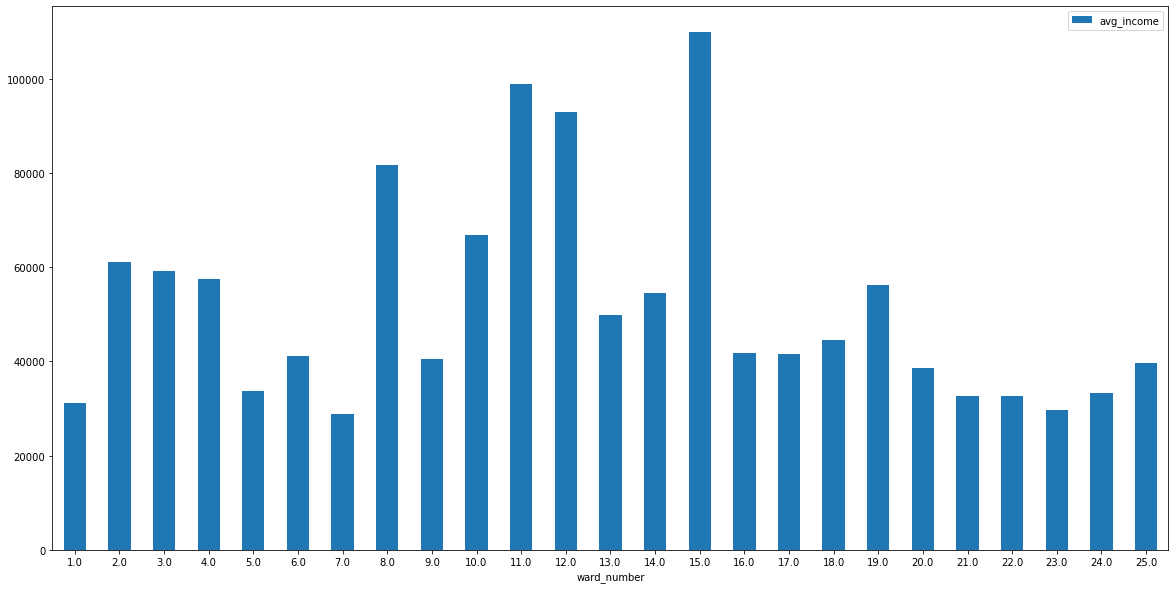

In [48]:
##Plot graphs for income
income_graph = df_income_pop_change_new_subset_transpose.plot.bar(x='ward_number', y='avg_income', rot=0)

In [47]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,10)

#### By plotting the population change based on Wards in Toronto, we can see which wards are growing. If the population is growing, it means there is a possible growth of potential customers. Wards 3 and 10 have some potential, Ward 10 having a significant population growth.

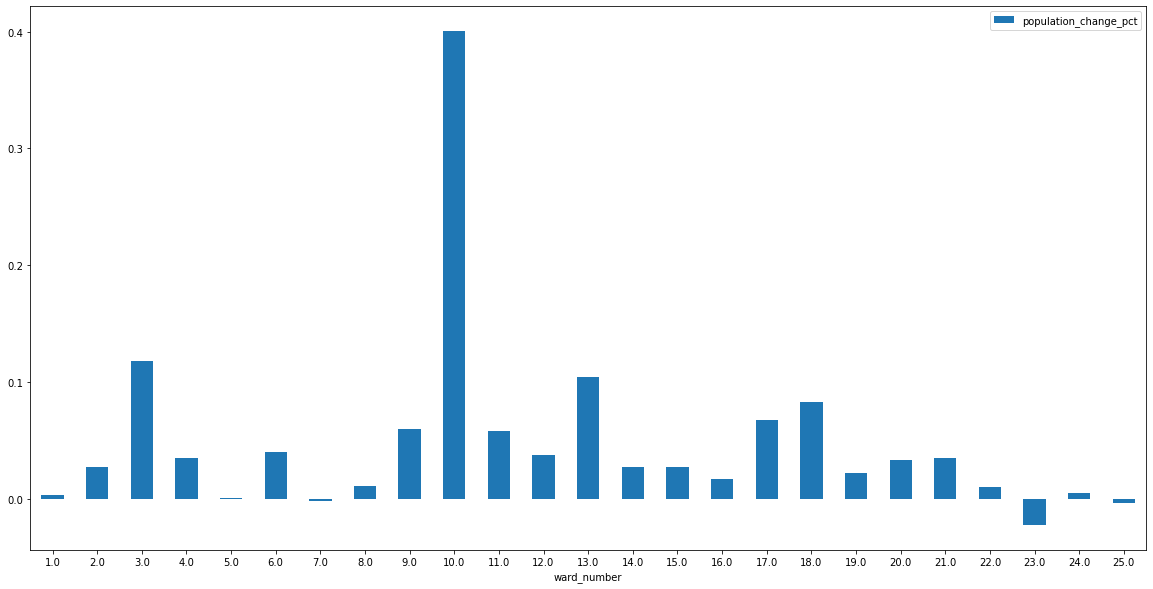

In [49]:
##Plot graphs for income
population_graph = df_income_pop_change_new_subset_transpose.plot.bar(x='ward_number', y='population_change_pct', rot=0)

In [ ]:
## We have an overall table of all the data together (geospatial, neighborhoods, postal codes, ward numbers, income, population change)

In [50]:
df_overall_table = df_toronto_geospatial_with_postalcode_2_drop.merge(df_income_pop_change_new_subset_transpose, left_on='ward_number', right_on='ward_number', how = 'left')
df_overall_table

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude,population_change_pct,avg_income
0,M4T,11,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0.0578571,98820
1,M6G,11,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.0578571,98820
2,M1L,20,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0.0332615,38546
3,M6J,9,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,0.0596913,40586
4,M2R,6,M2R,North York,Willowdale West,43.782736,-79.442259,0.0403391,41225
...,...,...,...,...,...,...,...,...,...
91,M4P,15,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0.0269485,109887
92,M6L,5,M6L,North York,"North Park, Maple Leaf Park, Upwood Park",43.713756,-79.490074,0.00064317,33742
93,M5G,10,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.400546,66906
94,M9N,5,M9N,York,Weston,43.706876,-79.518188,0.00064317,33742


In [51]:
import numpy as np # library to handle data in a vectorized manner

!pip install geopy

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [52]:
target_city = 'Toronto, ON'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(target_city)
latitude_target_city = location.latitude
longitude_target_city = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude_target_city, longitude_target_city))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


### We can plot the various points on a map

In [122]:
map_toronto = folium.Map(location=[latitude_target_city, longitude_target_city], zoom_start=11)

### Add markers to the map
for lat, lng, borough, Neighborhood in zip(df_overall_table['Latitude'], df_overall_table['Longitude'], df_overall_table['Borough'], df_overall_table['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Now we will gather restaurant information from Foursquare

In [54]:
### Define Foursquare Credentials and Version
CLIENT_ID = 'OOYZEYC1TOG00Q2JTCRXUDOISBWGH1IZMDCO1NAP5MTW1RVL' # your Foursquare ID
CLIENT_SECRET = '2QZ4SUH2V50VNOJV4TJ5U0HGN4NUNAC3LLYI2IIUUZFH1PDE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#### Extracting restaurants in Toronto and corresponding neighborhoods

In [74]:
LIMIT=5000
def getNearbyRestaurants(names, latitudes, longitudes, radius=500):
    restaurant_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
                    
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # retrun only the venue name, corrdinates and catagoery
        restaurant_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_restaurant = pd.DataFrame([item for restaurant_list in restaurant_list for item in restaurant_list])
    nearby_restaurant.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Restaurant', 
                  'Restaurant Latitude', 
                  'Restaurant Longitude', 
                  'Restaurant Category']
    
    return(nearby_restaurant)   

In [75]:
all_restaurants=getNearbyRestaurants(names=df_overall_table['Neighborhood'], latitudes=df_overall_table['Latitude'], longitudes=df_overall_table['Longitude'], radius=500)

#### We can see the list of restaurants and neighborhoods

In [76]:
all_restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Restaurant,Restaurant Latitude,Restaurant Longitude,Restaurant Category
0,"Moore Park, Summerhill East",43.689574,-79.383160,Moorevale Park,43.693610,-79.383465,Playground
1,Christie,43.669542,-79.422564,Fiesta Farms,43.668471,-79.420485,Grocery Store
2,Christie,43.669542,-79.422564,Contra Cafe,43.669107,-79.426105,Café
3,Christie,43.669542,-79.422564,Vinny’s Panini,43.670679,-79.426148,Italian Restaurant
4,Christie,43.669542,-79.422564,Starbucks,43.671530,-79.421400,Coffee Shop
5,Christie,43.669542,-79.422564,Scout and Cash Caffe,43.667360,-79.419938,Café
6,Christie,43.669542,-79.422564,Actinolite,43.667858,-79.428054,Restaurant
7,Christie,43.669542,-79.422564,Stubbe Chocolates,43.671566,-79.421289,Candy Store
8,Christie,43.669542,-79.422564,Faema Caffe,43.671046,-79.419297,Café
9,Christie,43.669542,-79.422564,Loblaws,43.671657,-79.421364,Grocery Store


#### Doing a count of restaurants

In [80]:
all_restaurants_grouped=all_restaurants.groupby('Neighborhood').size().to_frame('Count').reset_index()
all_restaurants_grouped.reset_index(inplace=True)
all_restaurants_grouped

,index,Neighborhood,Count
0,0,Agincourt,4
1,1,"Alderwood, Long Branch",9
2,2,"Bathurst Manor, Wilson Heights, Downsview North",22
3,3,Bayview Village,4
4,4,"Bedford Park, Lawrence Manor East",25
5,5,Berczy Park,58
6,6,"Birch Cliff, Cliffside West",4
7,7,"Brockton, Parkdale Village, Exhibition Place",25
8,8,"CN Tower, King and Spadina, Railway Lands, Har...",16
9,9,Caledonia-Fairbanks,4


In [84]:
#Find top restaurants

all_restaurants_onehot=pd.get_dummies(all_restaurants[['Restaurant Category']], prefix="", prefix_sep="")
all_restaurants_onehot['Neighborhood'] = all_restaurants['Neighborhood'] 
fixed_columns = [all_restaurants_onehot.columns[-1]] + list(all_restaurants_onehot.columns[:-1])
all_restaurants_onehot.head()

,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [85]:
#Calculate mean frequency occurrence for each category

all_restaurants_one_grouped = all_restaurants_onehot.groupby('Neighborhood').mean().reset_index()
all_restaurants_one_grouped.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0

#### We will find the top 5 types of restaurants and see if eating out is a popular activity

In [86]:
#Calculate Top 5 Restaurants
for hood in all_restaurants_one_grouped ['Neighborhood']:
    temp = all_restaurants_one_grouped [all_restaurants_one_grouped ['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})

In [87]:
def return_most_common_res(row, num_top_venues):               #function that will sort the resturants in desecnding order 
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [89]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant Type'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Resturant Type'.format(ind+1))

# create a new dataframe
neighborhoods_res_sorted = pd.DataFrame(columns=columns)
neighborhoods_res_sorted['Neighborhood'] = all_restaurants_one_grouped['Neighborhood']

for ind in np.arange(all_restaurants_one_grouped.shape[0]):
    neighborhoods_res_sorted.iloc[ind, 1:] = return_most_common_res(all_restaurants_one_grouped.iloc[ind, :], num_top_venues)

neighborhoods_res_sorted

,Neighborhood,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type,4th Most Common Resturant Type,5th Most Common Resturant Type
0,Agincourt,Lounge,Breakfast Spot,Latin American Restaurant,Clothing Store,Yoga Studio
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Playground,Sandwich Place,Pub
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Restaurant,Intersection,Sushi Restaurant
3,Bayview Village,Bank,Japanese Restaurant,Chinese Restaurant,Café,Yoga Studio
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Coffee Shop,Pizza Place,Greek Restaurant
5,Berczy Park,Coffee Shop,Bakery,Cocktail Bar,Restaurant,Cheese Shop
6,"Birch Cliff, Cliffside West",College Stadium,Skating Rink,Café,General Entertainment,Yoga Studio
7,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Performing Arts Venue,Yoga Studio
8,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Boat or Ferry
9,Caledonia-Fairbanks,Park,Women's Store,Pool,Yoga Studio,Drugstore


#### Below is the entire dataset (geospatial, income, population change, and restaurant info)

In [90]:
df_overall_table_restaurant = df_overall_table.merge(neighborhoods_res_sorted, left_on='Neighborhood', right_on='Neighborhood', how = 'left')
df_overall_table_restaurant

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude,population_change_pct,avg_income,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type,4th Most Common Resturant Type,5th Most Common Resturant Type
0,M4T,11,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0.0578571,98820,Playground,Yoga Studio,Diner,Falafel Restaurant,Event Space
1,M6G,11,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.0578571,98820,Grocery Store,Café,Park,Restaurant,Coffee Shop
2,M1L,20,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0.0332615,38546,Bakery,Park,Metro Station,Bus Line,Intersection
3,M6J,9,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,0.0596913,40586,Bar,Café,Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant
4,M2R,6,M2R,North York,Willowdale West,43.782736,-79.442259,0.0403391,41225,Pizza Place,Supermarket,Coffee Shop,Butcher,Discount Store
5,M4R,8,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,0.0110031,81773,Coffee Shop,Clothing Store,Yoga Studio,Mexican Restaurant,Restaurant
6,M6N,9,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262,0.0596913,40586,Brewery,Convenience Store,Grocery Store,Bus Line,Eastern European Restaurant
7,M6R,4,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,0.0352029,57459,Breakfast Spot,Gift Shop,Bookstore,Bar,Dog Run
8,M4L,14,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0.0274466,54560,Sandwich Place,Ice Cream Shop,Pub,Liquor Store,Burrito Place
9,M8Y,3,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,0.118205,59192,Baseball Field,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant


#### Clustering the Neighborhoods Based on Restaurant Types

In [104]:
#Cluster Based on Restaurant Types

k=15
resturant_grouped_cluster = all_restaurants_one_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(resturant_grouped_cluster)

In [112]:
neighborhoods_res_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_w_clusters_res = df_overall_table

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_w_clusters_res = toronto_w_clusters_res.join(neighborhoods_res_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_w_clusters_res['Cluster Labels'] = toronto_w_clusters_res['Cluster Labels'].fillna("0").astype(int)
toronto_w_clusters_res['Cluster Labels'] = toronto_w_clusters_res['Cluster Labels'].astype('int32')
toronto_w_clusters_res.head()

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude,population_change_pct,avg_income,Cluster Labels,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type,4th Most Common Resturant Type,5th Most Common Resturant Type
0,M4T,11,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0.0578571,98820,2,Playground,Yoga Studio,Diner,Falafel Restaurant,Event Space
1,M6G,11,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.0578571,98820,8,Grocery Store,Café,Park,Restaurant,Coffee Shop
2,M1L,20,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0.0332615,38546,12,Bakery,Park,Metro Station,Bus Line,Intersection
3,M6J,9,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,0.0596913,40586,1,Bar,Café,Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant
4,M2R,6,M2R,North York,Willowdale West,43.782736,-79.442259,0.0403391,41225,8,Pizza Place,Supermarket,Coffee Shop,Butcher,Discount Store


In [123]:
map_clusters_by_res = folium.Map(location=[latitude_target_city, longitude_target_city], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_w_clusters_res['Latitude'], toronto_w_clusters_res['Longitude'], toronto_w_clusters_res['Neighborhood'], toronto_w_clusters_res['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_by_res)
       
display(map_clusters_by_res)

##Analysis
We had discussed earlier, based on our analysis of the income data and population change, that wards 3, 10, 11, 12, and 15 appear to be the favourable areas. We will focus on these areas.

#### Cluster Ward 15 (Chosen Based on Income)

In [117]:
cluster_ward_15=toronto_w_clusters_res.loc[toronto_w_clusters_res['ward_number'] == 15]
cluster_ward_15

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude,population_change_pct,avg_income,Cluster Labels,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type,4th Most Common Resturant Type,5th Most Common Resturant Type
14,M2L,15,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714,0.0269485,109887,9,Martial Arts School,Yoga Studio,Fast Food Restaurant,Falafel Restaurant,Event Space
17,M4G,15,M4G,East York,Leaside,43.709060,-79.363452,0.0269485,109887,1,Coffee Shop,Sporting Goods Shop,Bank,Burger Joint,Sushi Restaurant
78,M4H,15,M4H,East York,Thorncliffe Park,43.705369,-79.349372,0.0269485,109887,1,Indian Restaurant,Yoga Studio,Coffee Shop,Liquor Store,Burger Joint
83,M4N,15,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.0269485,109887,1,Dim Sum Restaurant,Park,Bus Line,Swim School,Drugstore
88,M2P,15,M2P,North York,York Mills West,43.752758,-79.400049,0.0269485,109887,13,Park,Convenience Store,Bar,Yoga Studio,Eastern European Restaurant
91,M4P,15,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0.0269485,109887,1,Pizza Place,Breakfast Spot,Hotel,Food & Drink Shop,Department Store


#### Cluster Ward 11 (Chosen Based on Income)

In [118]:
cluster_ward_11=toronto_w_clusters_res.loc[toronto_w_clusters_res['ward_number'] == 11]
cluster_ward_11

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude,population_change_pct,avg_income,Cluster Labels,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type,4th Most Common Resturant Type,5th Most Common Resturant Type
0,M4T,11,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0.0578571,98820,2,Playground,Yoga Studio,Diner,Falafel Restaurant,Event Space
1,M6G,11,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.0578571,98820,8,Grocery Store,Café,Park,Restaurant,Coffee Shop
32,M5S,11,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,0.0578571,98820,8,Café,Bookstore,Bar,Japanese Restaurant,Sandwich Place
37,M5R,11,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.0578571,98820,8,Café,Sandwich Place,Coffee Shop,Liquor Store,Donut Shop
39,M4W,11,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0.0578571,98820,3,Park,Playground,Trail,Yoga Studio,Drugstore


#### Cluster Ward 12 (Chosen Based on Income)

In [119]:
cluster_ward_12=toronto_w_clusters_res.loc[toronto_w_clusters_res['ward_number'] == 12]
cluster_ward_12

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude,population_change_pct,avg_income,Cluster Labels,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type,4th Most Common Resturant Type,5th Most Common Resturant Type
12,M5P,12,M5P,Central Toronto,Forest Hill North & West,43.696948,-79.411307,0.0376497,92952,3,Jewelry Store,Park,Trail,Sushi Restaurant,Drugstore
25,M4V,12,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0.0376497,92952,8,Coffee Shop,Fried Chicken Joint,American Restaurant,Bank,Liquor Store
49,M4S,12,M4S,Central Toronto,Davisville,43.704324,-79.388790,0.0376497,92952,8,Dessert Shop,Sandwich Place,Pizza Place,Café,Gym
66,M6C,12,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,0.0376497,92952,1,Field,Hockey Arena,Trail,Tennis Court,Event Space


#### Cluster Ward 10 (Chosen Based on Population Change)

In [120]:
cluster_ward_10=toronto_w_clusters_res.loc[toronto_w_clusters_res['ward_number'] == 10]
cluster_ward_10

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude,population_change_pct,avg_income,Cluster Labels,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type,4th Most Common Resturant Type,5th Most Common Resturant Type
18,M5J,10,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0.400546,66906,8,Coffee Shop,Aquarium,Hotel,Café,Restaurant
22,M5V,10,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,0.400546,66906,1,Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Boat or Ferry
23,M5T,10,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,0.400546,66906,1,Café,Bar,Bakery,Vietnamese Restaurant,Coffee Shop
53,M6K,10,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,0.400546,66906,8,Café,Coffee Shop,Breakfast Spot,Performing Arts Venue,Yoga Studio
76,M5H,10,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0.400546,66906,8,Coffee Shop,Café,Thai Restaurant,Restaurant,Gym
87,M5E,10,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.400546,66906,1,Coffee Shop,Bakery,Cocktail Bar,Restaurant,Cheese Shop
93,M5G,10,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.400546,66906,8,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Bubble Tea Shop


#### Cluster Ward 3 (Chosen Based on Population Change)

In [121]:
cluster_ward_3=toronto_w_clusters_res.loc[toronto_w_clusters_res['ward_number'] == 3]
cluster_ward_3

,postal_code,ward_number,Postal Code,Borough,Neighborhood,Latitude,Longitude,population_change_pct,avg_income,Cluster Labels,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type,4th Most Common Resturant Type,5th Most Common Resturant Type
9,M8Y,3,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,0.118205,59192,5,Baseball Field,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant
13,M9B,3,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.650943,-79.554724,0.118205,59192,0,Middle Eastern Restaurant,Bakery,Yoga Studio,Distribution Center,Farmers Market
21,M8V,3,M8V,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",43.605647,-79.501321,0.118205,59192,1,Café,Pet Store,Bakery,Hobby Shop,Flower Shop
26,M8Z,3,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,0.118205,59192,1,Hardware Store,Tanning Salon,Grocery Store,Flower Shop,Fast Food Restaurant
43,M8W,3,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0.118205,59192,8,Pizza Place,Pharmacy,Playground,Sandwich Place,Pub
79,M9A,3,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,0.118205,59192,0,NaN,NaN,NaN,NaN,NaN
95,M8X,3,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,0.118205,59192,1,River,Smoke Shop,Pool,Yoga Studio,Donut Shop


## Conclusions

It appears that Ward 15 is the most favourable place to start a business. Ward 15 has the high average income and although its population growth is not considered high, it is not negative. There is still a chance to grow clientele. Ward 15 also has dining restaurants as its their top type of restaurant venue, whereas the other wards appear to have smaller entities, such as cafes or pizza places. It appears that people may not be interested in dining out.

### Assumptions
Of course, there have been broad assumptions in this exercise. It is assumed that each neighborhood in the same ward experiences the same population growth and same average income. It is likely that neighborhoods within a certain ward will have disparity within each other. It is also assumed that the population growth will progress in the same way as in the past, although it may not happen in reality.